# Import modules

In [1]:
!pip install wordcloud==1.8.1

     |████████████████████████████████| 366 kB 32.7 MB/s 


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import string

import sys
sys.path.insert(0, "/work/emotions-nlp")

from src.utils.functions import *

# Import Data

In [3]:
# Import Dataset
df = pd.read_csv("/work/emotions-nlp/Data/raw_data/Emotion_final.csv")

In [4]:
# Print first five rows
df.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


# Dataset Analysis

In [5]:
# Size of our dataset
print("There are {} rows and {} columns in our dataset".format(df.shape[0], df.shape[1]))

There are 21459 rows and 2 columns in our dataset


In [6]:
# Checking if there are missing values 
df.isnull().sum()

Text       0
Emotion    0
dtype: int64

In [7]:
# Checking the number of different emotions
df['Emotion'].value_counts()

happy       7029
sadness     6265
anger       2993
fear        2652
love        1641
surprise     879
Name: Emotion, dtype: int64

In [8]:
df.describe()

,Text,Emotion
count,21459,21459
unique,21405,6
top,i loved the feeling i got during an amazing sl...,happy
freq,2,7029


In [9]:
df['Text'].duplicated().sum()

54

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='Emotion'>

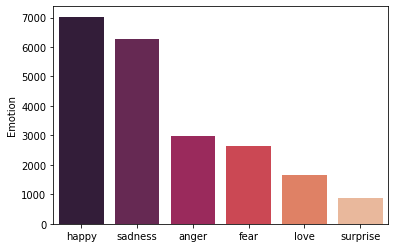

In [10]:
# Histogramme de la fréquence des émotions
sns.barplot(df['Emotion'].value_counts().index,df['Emotion'].value_counts(),palette='rocket')

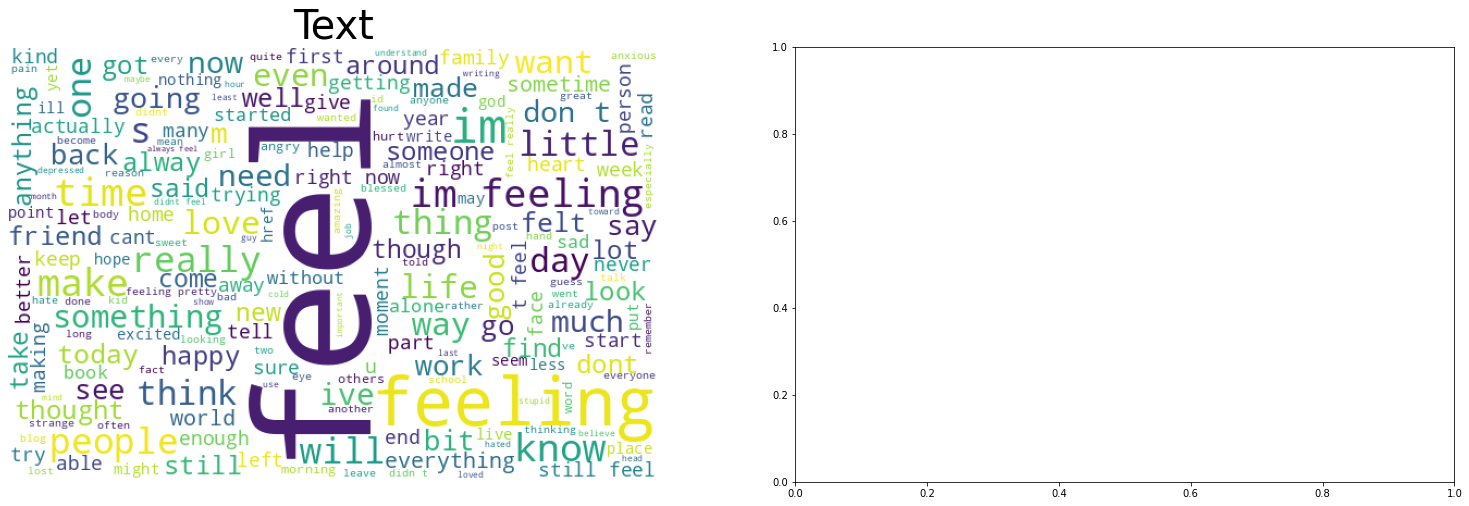

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[26, 8])
wordcloud = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(df['Text']))
ax1.imshow(wordcloud)
ax1.axis('off')
ax1.set_title('Text',fontsize=40);

# Text Data Preprocessing

## 1. Data Cleaning

* Make text all lower case 
* Removing Noise (everything that isn't in a standard number ot letter like ponctuation, numerical values, common non-sensical text)
* Tokenization
* Stopword removal
* Stemming/lemmatization

In [12]:
!pip install contractions

     |████████████████████████████████| 283 kB 32.1 MB/s 
     |████████████████████████████████| 321 kB 73.8 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=34173 sha256=006a4ee72da4f5ba78a31450a5639ceba9ed98bcddddf2a82865a5909872182a
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [13]:
import contractions
# Transform contractions into negavtive form
df['clean_text'] = df['Text'].apply(lambda x: contractions.fix(x))

In [14]:
import nltk
# Download english stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
# Making text in lower case and removing all noise(links, ponctuation, words containing numbers)
df['clean_text'] = df['clean_text'].apply(lambda x: clean_text(x))

In [16]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [17]:
from nltk.tokenize import word_tokenize
# Tokenization
df['tokenized'] = df['clean_text'].apply(word_tokenize)

In [18]:
# Remove stopwords from the text
df['stopwords_removed'] = df['tokenized'].apply(lambda x: remove_stopwords(x))

In [19]:
# Stemming
df['porter_stemmer'] = df['stopwords_removed'].apply(lambda x: porter_stemmer(x))

In [20]:
df.head()

,Text,Emotion,clean_text,tokenized,stopwords_removed,porter_stemmer
0,i didnt feel humiliated,sadness,i did not feel humiliated,"[i, did, not, feel, humiliated]","[not, feel, humiliated]","[not, feel, humili]"
1,i can go from feeling so hopeless to so damned...,sadness,i can go from feeling so hopeless to so damned...,"[i, can, go, from, feeling, so, hopeless, to, ...","[go, feeling, hopeless, damned, hopeful, aroun...","[go, feel, hopeless, damn, hope, around, someo..."
2,im grabbing a minute to post i feel greedy wrong,anger,i am grabbing a minute to post i feel greedy w...,"[i, am, grabbing, a, minute, to, post, i, feel...","[grabbing, minute, post, feel, greedy, wrong]","[grab, minut, post, feel, greedi, wrong]"
3,i am ever feeling nostalgic about the fireplac...,love,i am ever feeling nostalgic about the fireplac...,"[i, am, ever, feeling, nostalgic, about, the, ...","[ever, feeling, nostalgic, fireplace, know, st...","[ever, feel, nostalg, fireplac, know, still, p..."
4,i am feeling grouchy,anger,i am feeling grouchy,"[i, am, feeling, grouchy]","[feeling, grouchy]","[feel, grouchi]"


In [23]:
# Saving clean data to a new csv file 
df.to_csv('/work/emotions-nlp/Data/intermediate_data/clean_data.csv')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=63592523-ebbf-40aa-802d-b9939a22188a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>